In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./test.csv")
final_data = data.drop(['time','magType', 'updated', 'type', 'status','id','place','net', 'locationSource','magSource'], axis=1)
final_data.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,38.1598,-117.8900,8.80,2.60,31.0,60.73,0.0670,0.13,NaN,1.00,NaN,NaN
1,-17.6299,-178.5238,500.76,5.10,NaN,144.00,3.2650,0.95,13.70,12.60,0.172,11.0
2,59.5509,-149.5916,13.30,2.90,NaN,NaN,NaN,0.61,NaN,0.40,NaN,NaN
3,-41.7072,-74.0040,35.00,4.10,NaN,113.00,0.4990,1.03,5.30,2.00,0.214,6.0
4,17.8308,-66.8846,5.00,3.06,23.0,233.00,0.1444,0.28,0.78,0.61,0.310,19.0


In [111]:
# a is array
def fill(a):
    
    mean = np.mean(a[~np.isnan(a)])
    std = np.std(a[~np.isnan(a)])
    
    for i in range(len(a)):
        if math.isnan(a[i]):
            a[i] = int(normal(mean, std))
            
    return a

In [123]:
fill_value = np.array(final_data[['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst']])

for i in range(6):
    fill_value[:,i] = fill(fill_value[:,i])
    
final_data.loc[:,['nst']]

,nst
0,31.0
1,24.0
2,29.0
3,28.0
4,23.0
...,...
891,21.0
892,19.0
893,21.0
894,15.0


In [113]:
import datetime
import time

timestamp = []
for d in data['time']:
    try:
        ts = datetime.datetime.strptime(d[0:9]+' '+d[11:19], '%Y-%m-%d %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('ValueError')

In [114]:
timeStamp = pd.Series(timestamp)
filled_value = pd.DataFrame(fill_value)
final_data['timestamp'] = timeStamp.values
final_data['nst'] = fill_value[:,0]
final_data['gap'] = fill_value[:,1]
final_data['dmin'] = fill_value[:,2]
final_data['horizontalError'] = fill_value[:,3]
final_data['magError'] = fill_value[:,4]
final_data['magNst'] = fill_value[:,5]

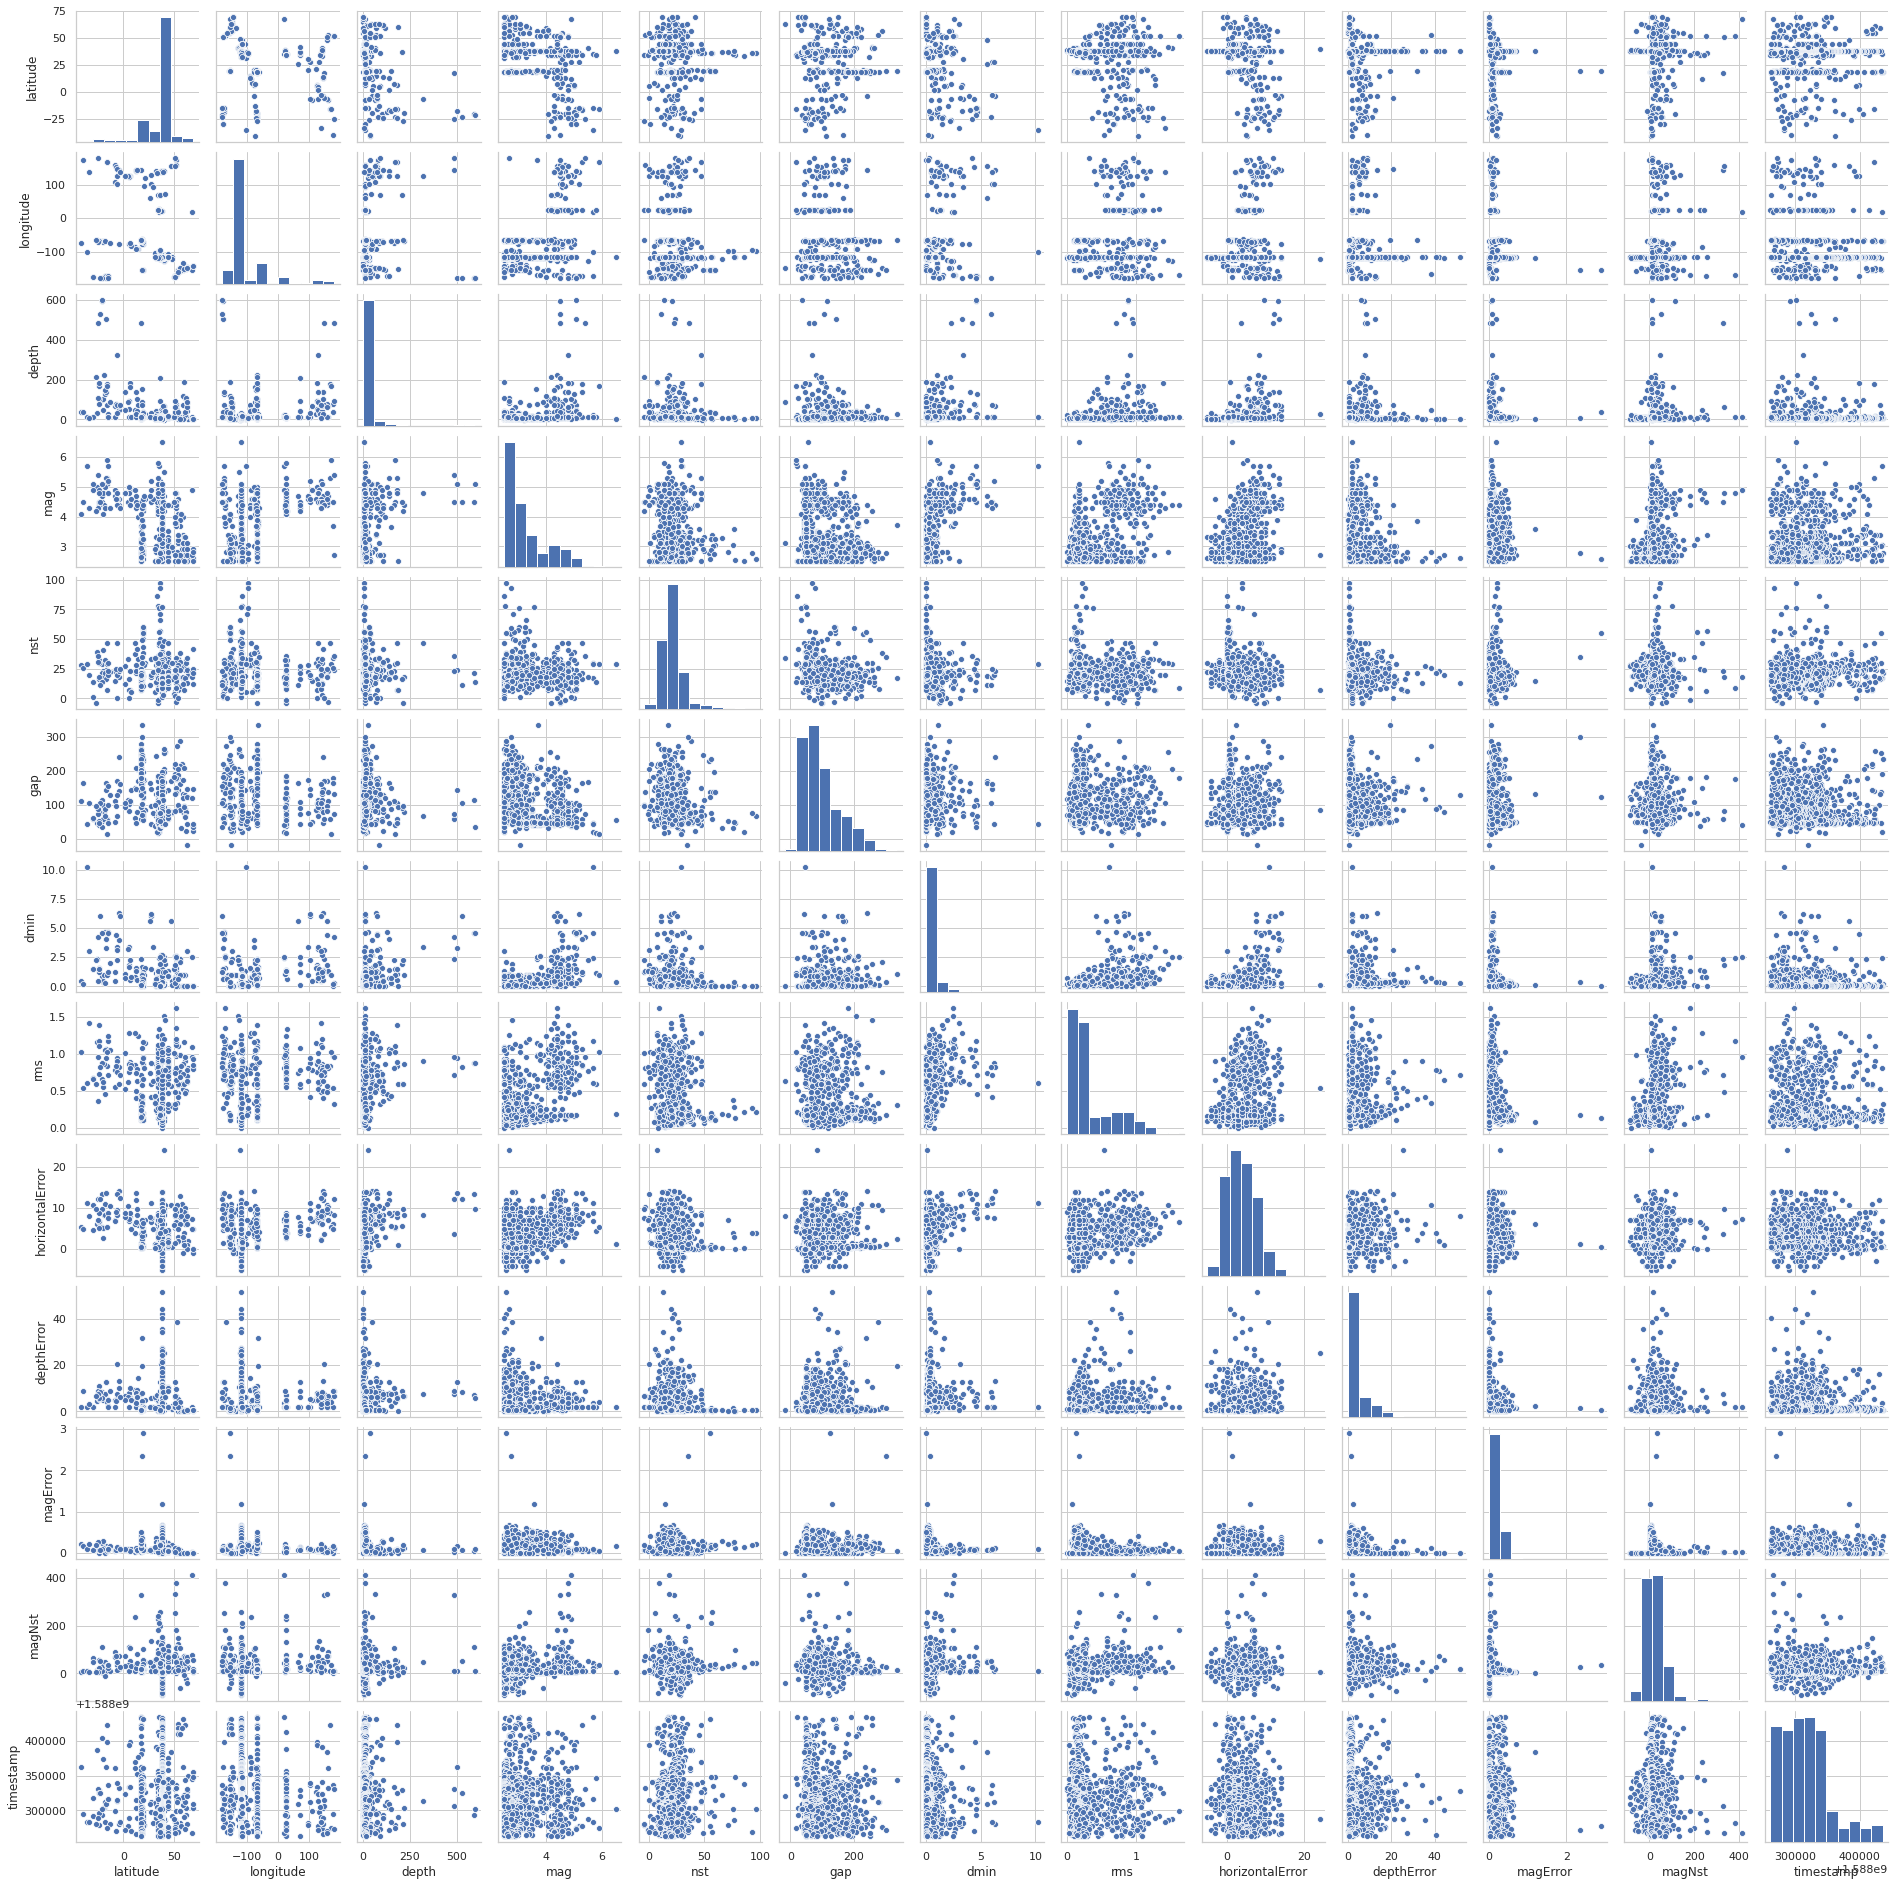

In [127]:
sns.set(style='whitegrid', context='notebook')   #style控制預設樣式,context控制著預設的畫幅大小
sns.pairplot(final_data, size=2)

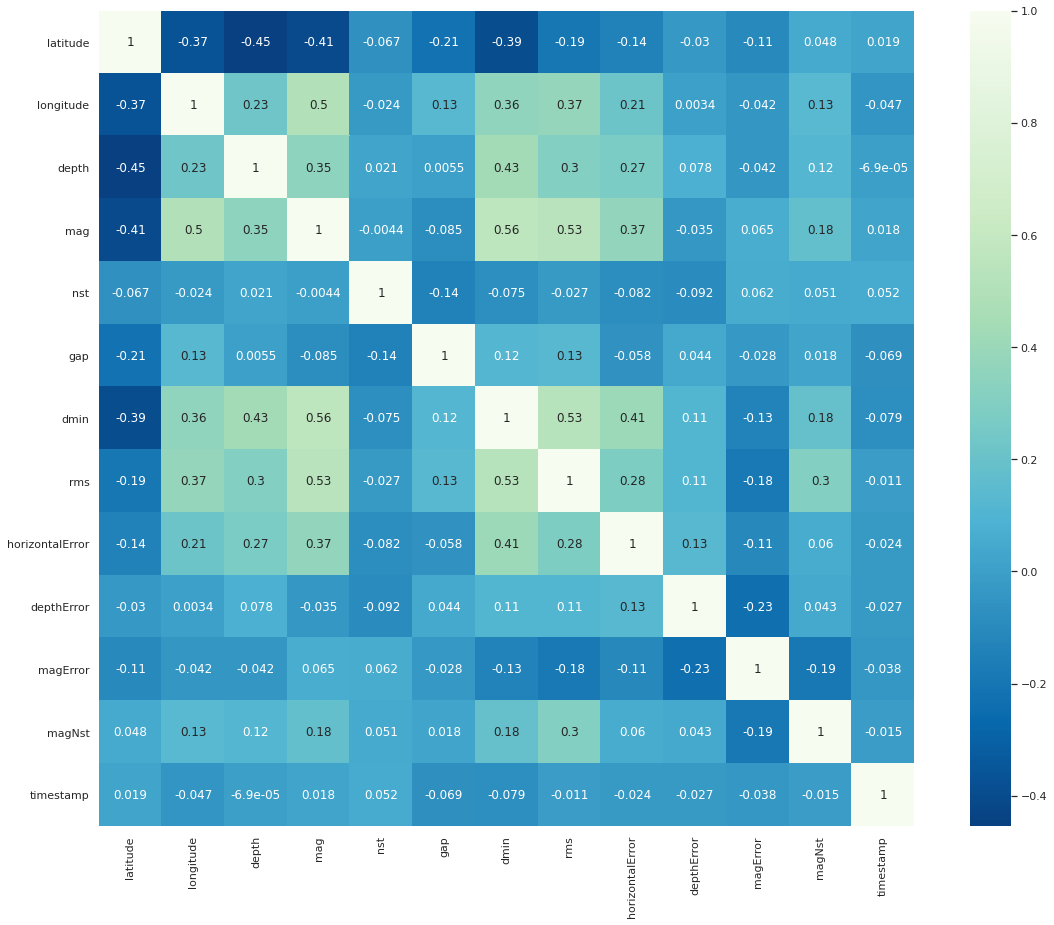

In [125]:
corr = final_data.corr()
plt.subplots(figsize=(20,15))
# 相關度熱力圖
sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True)

In [6]:
X = final_data[['timestamp', 'latitude', 'longitude']]
y = final_data[['mag', 'depth']]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2198, 3) (550, 3) (2198, 2) (550, 2)


In [31]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
#reg.predict(X_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [32]:
reg.score(X_test, y_test)

/home/arg/machine_learning/machine_learning/lib/python3.6/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.36735022125206906

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

/home/arg/machine_learning/machine_learning/lib/python3.6/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/arg/machine_learning/machine_learning/lib/python3.6/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

/home/arg/machine_learning/machine_learning/lib/python3.6/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/home/arg/machine_learning/machine_learning/lib/python3.6/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the 

array([[  2.8427,  21.5414],
       [  3.8237,  10.1709],
       [  2.795 ,   7.567 ],
       [  2.77  ,   7.088 ],
       [  3.405 ,   6.8447],
       [  4.391 ,   8.989 ],
       [  2.95  ,   7.104 ],
       [  4.571 ,  33.2182],
       [  4.787 ,  58.9059],
       [  2.957 ,  10.45  ],
       [  3.6646,  30.0406],
       [  3.5421,  20.9904],
       [  2.834 ,   6.8833],
       [  2.796 ,   4.609 ],
       [  4.211 ,   9.9503],
       [  3.013 ,   6.606 ],
       [  2.88  ,   7.6106],
       [  3.31  ,   8.8782],
       [  2.774 ,   6.2276],
       [  2.8459,   9.437 ],
       [  2.8567,   8.16  ],
       [  2.833 ,  46.144 ],
       [  2.9962,  24.7966],
       [  3.7424,  11.0568],
       [  3.21  ,   7.92  ],
       [  4.665 ,  10.    ],
       [  3.3679,  27.5082],
       [  2.7037,  10.74  ],
       [  2.947 ,   5.5531],
       [  2.958 ,   9.2386],
       [  3.066 ,   6.5131],
       [  2.8533,  19.6639],
       [  2.766 ,   6.9756],
       [  2.7651,  10.85  ],
       [  2.94

In [34]:
best_fit.score(X_test, y_test)

/home/arg/machine_learning/machine_learning/lib/python3.6/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.36735022125206906